LR : 0.162829976437694
MPL1 : 0.06804140737968428
MPL2 : 0.0978071820387748
N_iter MPL1: 452
N_iter MPL2: 77


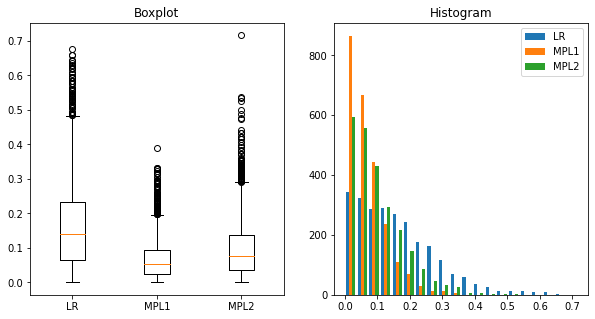

In [ ]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = loadarff('/content/kin8nm.arff')
df = pd.DataFrame(data[0])

X = df.drop('y', axis=1)
y = df['y']

regressors = [
    ("LR", Ridge(alpha=0.1)),
    ("MPL1", MLPRegressor(hidden_layer_sizes=(10,10),activation='tanh',max_iter=500,random_state=0,early_stopping=True)),
    ("MPL2", MLPRegressor(hidden_layer_sizes=(10,10),activation='tanh',max_iter=500,random_state=0,early_stopping=False)),
]

iter=[]
residues = []

for name,regressor in regressors:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,random_state=0)
  if name=="LR":
    regressor.fit(X_train.values,y_train.values)
    y_pred = regressor.predict(X_test.values)
  else:
    regressor.fit(X_train.values,y_train.values)
    y_pred = regressor.predict(X_test.values)
    iter.append(regressor.n_iter_)
  residues.append(abs(y_test.values-y_pred))
  print(name,":",mean_absolute_error(y_test,y_pred))

print("N_iter MPL1:",iter[0])
print("N_iter MPL2:",iter[1])

#Boxplot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(residues)
plt.xticks([1,2,3],["LR","MPL1","MPL2"])
plt.title("Boxplot")
#Histogram
plt.subplot(1,2,2)
plt.hist(residues,bins=20)
plt.legend(["LR","MPL1","MPL2"])
plt.title("Histogram")
plt.show()


